### Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

### Reading Data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()






29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Plotting utility function

def plot_results(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.legend()

    plt.show()

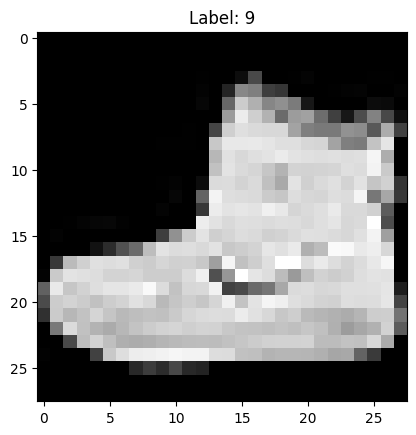

In [4]:
# Visualize images with their reference
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()



In [6]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# Convert Categorical data to numerical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)


In [9]:
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

In [10]:
model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128),
        BatchNormalization(),
        Dropout(0.2),
        Activation('relu'),
        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[EarlyStopping(patience=3), LearningRateScheduler(lr_scheduler)]
    )


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7698 - loss: 0.6697 - val_accuracy: 0.8446 - val_loss: 0.4234 - learning_rate: 0.0010
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8515 - loss: 0.4074 - val_accuracy: 0.8420 - val_loss: 0.4244 - learning_rate: 0.0010
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8649 - loss: 0.3708 - val_accuracy: 0.8606 - val_loss: 0.3802 - learning_rate: 0.0010
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8716 - loss: 0.3488 - val_accuracy: 0.8632 - val_loss: 0.3621 - learning_rate: 0.0010
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8791 - loss: 0.3325 - val_accuracy: 0.8650 - val_loss: 0.3598 - learning_rate: 0.0010
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8868 - loss: 0.3074 - val_accuracy: 0.8648 - val_loss: 0.3496 - learning_rate: 9.0484e-04
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.

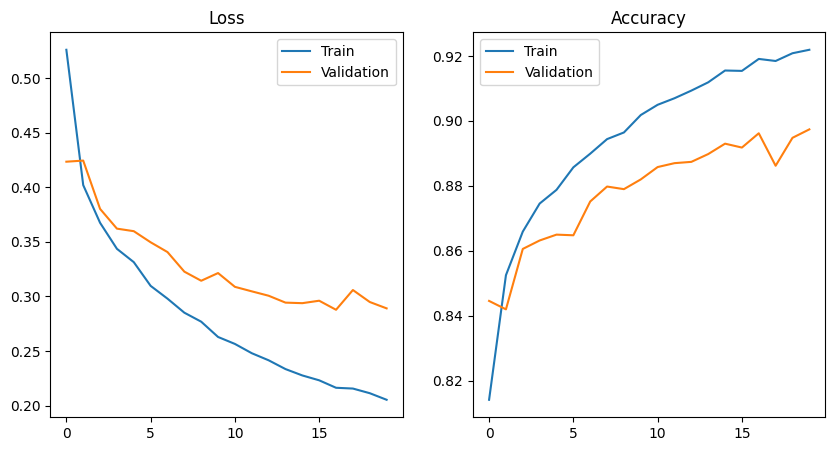

In [12]:
plot_results(history)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       513
           1       0.99      0.98      0.99       508
           2       0.82      0.83      0.82       486
           3       0.89      0.93      0.91       522
           4       0.83      0.84      0.83       494
           5       0.98      0.96      0.97       481
           6       0.77      0.71      0.74       504
           7       0.94      0.98      0.96       478
           8       0.98      0.97      0.98       510
           9       0.97      0.96      0.97       504

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



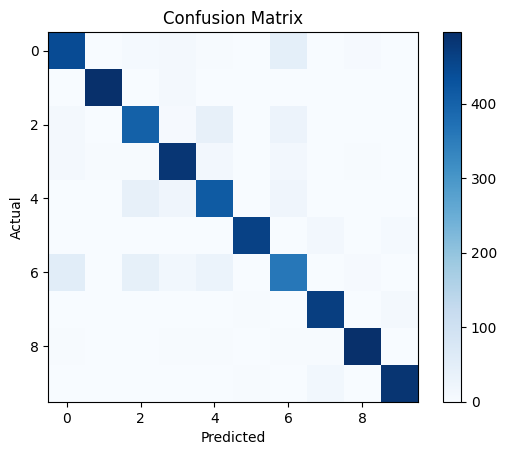

In [13]:
# Test the model
y_preds = model.predict(x_test)
y_preds = np.argmax(y_preds, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_preds))
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_preds)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


